# Schartz-Christoffel for 6 points case Ditch with rectangular profile

From chatGPT

Sketch of the cross section

       B-----------------A
       |
D ---- C
|
E -----------------------F

Top — ik ga er meteen voor. Ik maak een praktisch, direct toepasbaar stappenplan én een Python-voorbeeld (zonder het vooraf uit te voeren) waarmee je de parameter-probleem voor jouw 6-punt-figuur kunt oplossen. Ik houd het zo concreet mogelijk zodat je het zelf kunt draaien (of ik het voor je kan draaien als je wil).

Ik ga uit van jouw zes hoekpunten (in kaartcoördinaten, met y positief omhoog):

* (A=(\infty,0)) (vertex 1)
* (B=(b,0)) (vertex 2)
* (C=(c,-d)) (vertex 3) met (0<c<b) en (d>0)
* (D=(0,-d)) (vertex 4)
* (E=(0,-e)) (vertex 5) met (e>d>0)
* (F=(\infty,-e)) (vertex 6)

We willen een Schwarz–Christoffel (SC) mapping (f) van de bovenhalf-vlakte (\mathbb{H}) (variabele (\zeta)) naar deze veelhoek in het (z)-vlak.

---

## 1) Kernidee & notatie (kort)

Een SC-mapping van de bovenhelft naar een n-hoek met hoekhoeken (\alpha_k) heeft de vorm
[
f(\zeta)=C + K\int^\zeta \prod_{k=1}^n (\omega-a_k)^{\beta_k-1},d\omega,
\qquad \beta_k = 1-\frac{\alpha_k}{\pi},
]
waar (a_k) de **prevertices** op de reële as zijn (een geordende rij (a_1< a_2<\dots<a_n) ), en (C,K) complexe constanten. Drie vrijheden (Möbius + schaling/translatie) kun je vastzetten; daardoor blijven (n-3) reële onbekenden over die je moet bepalen door lengtenvoorwaarden (de zogenaamde *side length equations*).

Vertices op (\infty): deze worden in de theorie behandeld door óf een geschikte Möbius-transformatie te kiezen die (\infty) naar een eindig prevertex stuurt, óf door het feit dat een hoek op (\infty) met bepaalde (\alpha) leidt tot een vereenvoudigde factor in het product. In de numerieke praktijk is het het eenvoudigst om eerst een Möbius-transformatie te kiezen die de twee oneindige vertices naar eindige punten op de reële as brengt — daarna is de standaard toolbox-oplossing toepasbaar.

---

## 2) Concrete aanpak voor jouw configuratie (stappen)

**Stap 0 — Normalisatie / Möbius-fix**

* Gebruik een Möbius-transformatie (M) op de (\zeta)-as zodat de prevertices van de twee oneindige vertices *niet* op (\infty) blijven. Een gebruikelijke keuze is om drie prevertices vast te zetten, bijv. (a_1=\infty) wordt met (M) naar (+\infty) of naar een eindig punt; praktischer in numeriek werk: fixeer drie eindige prevertices, bijvoorbeeld
  [
  a_2= -1,\qquad a_4=0,\qquad a_5=1
  ]
  (dus B→−1, D→0, E→1 in prevertexruimte). Dat is een veelgebruikte normalisatie omdat je later B en E toch naar (-1) en (+1) wilde plaatsen. (Je keuze is vrij — kies wat handig is.)

**Stap 1 — bepaal de binnenhoeken (\alpha_k)**

* Bereken de binnenhoeken (\alpha_k) van de veelhoek uit de coördinaat-vectoren bij elk hoekpunt. Rekenregel: de binnenhoek bij vertex (k) is de hoek tussen de inkomende en uitgaande randvectoren (reken dit met `atan2` zodat teken en richting kloppen). Voor een hoekpunt op een horizontale rand met een naar beneden gaande rand is dit meestal (\alpha\in(0,\pi)) of (\alpha=\pi) (recht hoekpunt = \pi). Schrijf expliciet de (\alpha_k) uit (zie code).
* Vervolgens (\beta_k=1-\alpha_k/\pi).

**Stap 2 — zet de prevertices en onbekenden**

* Na fixatie van drie prevertices (bijv. (a_2=-1, a_4=0, a_5=1)) zijn er (n-3=3) vrije reële prevertices over, zeg (x_1,x_2,x_3) (orden ze consistent op de reële as). Bijvoorbeeld de vrije prevertices corresponderen met de overige finite vertices (C en eventuele eindpunten van A/F na Möbius). (Je moet zorgvuldig toewijzen welke prevertex bij welke hoek hoort; dat volgt uit de oriëntatie van polygon.)

**Stap 3 — lengtevoorwaarden (parameterprobleem)**

* Voor elk zijde-paar in de veelhoek kun je de overeenkomstige lengte (L_j) uitdrukken via de SC-integraal tussen twee aangrenzende prevertices:
  [
  L_j = |K|\left| \int_{a_j}^{a_{j+1}} \prod_{k=1}^n (\omega-a_k)^{\beta_k-1} , d\omega \right|
  ]
* Je weet de geometrische lengtes van de (rechte) zijden in je doelpolygon: bijvoorbeeld de horizontale toprand (tussen (A) en (B)) is oneindig maar de **verschillen** tussen eindige zijden (zoals BC, CD, DE, EF) zijn bekend uit (b,c,d,e). Stel een overeenkomstig stelsel van (n−3) vergelijkingen op die deze lengtenvoorwaarden afdwingen **in verhoudingen** (gebruik relatief, zodat je K en C weg kunt laten). In de praktijk neem je bijvoorbeeld de ratios tussen opeenvolgende zijden zodat K wegvalt. Zie verdere toelichting in code.

**Stap 4 — los het niet-lineaire stelsel numeriek op**

* Gebruik `scipy.optimize.root` of `least_squares` om de (reële) onbekende prevertices (x_i) te vinden die de lengtevoorwaarden vervullen. Integreer de SC-integrand numeriek (bijv. `quad` of `quadpack`), opknippend langs reële integratiepaden en houd rekening met de juiste tak van de machtfunctie (gebruik `exp((beta-1)*log(...))` met `log` de hoofdwaarde; pas teken/branch consistentie toe).
* Startwaarden: zet de vrije prevertices gelijkmatig verdeeld tussen de vastgezette prevertices (bijv. `np.linspace(-2,2,...)`) — Driscoll raadt vaak betere initialisaties aan, maar dit werkt meestal.

**Stap 5 — verkrijg K en C en evalueer mapping**

* Wanneer de prevertices gevonden zijn, kies (K) en (C) met bijvoorbeeld de conditie dat (f(a_2)=B) en (f(a_5)=E) (of twee andere punten). Dit geeft twee complexe condities die (C) en (K) bepalen (houd hierbij de juiste oriëntatie aan). Daarna kun je (f(\zeta)) evalueren op punten en omkeren met Newton om (\zeta=f^{-1}(z)) te vinden.

**Stap 6 — terugtransformeer (Möbius & rotatie)**

* Als je in Stap 0 een Möbius op (\zeta) gedaan hebt, draai dit terug om de originele prevertexpositie en mapping te krijgen. Tenslotte kun je B naar (-1) en E naar (+1) mappen zoals je wilde, en met `arcsin`/symmetrie de armen omhoogklappen zoals in je plan (dat is een eenvoudige extra symmetrie-transformatie op het beeld).

---

** Toelichting op de code beneden**

* Je moet (a) de exacte toewijzing maken: welke prevertex (a_j) hoort bij welk hoekpunt (Z_j); (b) de exacte (\alpha_j) berekenen uit de hoek tussen randvectoren (gebruik `atan2` op complexe vectoren); (c) de lengte-targets correct instellen (gebruik de euclidische lengtes van de zijden in het (z)-vlak, of verhouding daarvan).
* De integratie moet complex-conform gebeuren: ik heb in het skelet reële integratie laten zien (integratie langs reële interval). Als prevertices in juiste orde op reële as liggen, dan is dat OK; als niet, pas integratiepad aan.
* Branches: gebruik consistente keuze van complex log bij het nemen van ((w-a_j)^{\beta_j-1}). Implementatie met `np.exp((beta-1)*np.log(w-a_j))` is meestal prima als integratiepad niet passeert door de reële a_j zelf.

---

## 4) Praktische hints & valkuilen

* **Sterk aanbevolen:** gebruik Toby Driscoll’s **SC-Toolbox** (MATLAB) als je dat kunt — die pakt al die takproblemen, infinite vertices en stabiliteitsissues keurig op en heeft handleidingen voor “vertices at infinity”. Als je geen MATLAB hebt, is bovenstaande Python-route prima, maar vereist iets meer finetunen.
* **Möbius voor infinities:** in jouw geval is het praktisch om (A) en (F) (oneindig) met een Möbius te sturen naar eindige prevertices. Een eenvoudige keuze: gebruik (T(\zeta) = (\zeta - r)/(\zeta - s)) waarbij (r,s) twee reële punten gekozen worden zodat de infinite kanten naar fijne posities gaan. Daarna los je parameterprobleem op, en keer je terug via (T^{-1}).
* **Startwaarden:** cruciaal voor convergentie. Gebruik `linspace` tussen je vastgezette prevertices of gebruik resultaten van eenvoudige cases (bijv. eerst een vereenvoudigde polygon als start).

---

## 5) Output: wat je straks hebt

* De numerieke waarden van de prevertices (a_k) (op de reële as).
* De normale constante (K) en translatie (C).
* Functie (f(\zeta)) waarmee je elk (\zeta\in\mathbb{H}) naar (z) berekent; en via Newton-inversie (f^{-1}(z)) ook terug.
* Met die (f) kun je dan B → −1 en E → +1 zetten (of dat al als normalisatie gebruiken) en de gevraagde extra symmetrie-bewerkingen uitvoeren (armen omhoog klappen met geschikte reflecties/arsin-transformaties).

---

## 6) Wil je dat ik het concreet voor jouw getallen uitvoer?

Je gaf (b,c,d,e) als symbolen. Als je me drie of vier concrete waarden (bv. (b=3.0,; c=1.5,; d=1.0,; e=2.0) of jouw echte waarden) geeft, dan draai ik het numeriek voor je (ik los het stelsel op, bepaal (a_k), (K), (C) en stuur terug: prevertices, plots in het (z)-vlak en een kleine routine om punten te mappen en indien gewenst de kaart B→−1, E→1 en de “arm-fold” transformatie).

Zeg welke concrete getallen je wilt gebruiken — dan ga ik meteen rekenen en krijg je de resultaten in één bericht terug.


Top — dank voor de correctie. Ik loop even kort door wat dat geometrisch betekent, geef de relevante SC-parameters (de (\alpha_k,\beta_k)), en stel daarna twee concrete vervolgroutes voor: (A) ik zet meteen een numerieke routine voor je op — dan heb ik wèl concrete getallen (b,c,e) nodig of jouw toestemming om voorbeeldwaarden te gebruiken; of (B) ik geef het volledig kant-klaar recept dat je zelf in MATLAB (SC-Toolbox) of Python kunt uitvoeren.

Kort en krachtig eerst de essentie van jouw gewijzigde polygon:

### Jouw punten (zoals jij ze nu opgeeft)

* (A=(\infty,0))
* (B=(b,0))
* (C=(b,-c))
* (D=(0,-c))
* (E=(0,-e))  met (e>c>0)
* (F=(\infty,0))

Dit is een horizontaal onbegrensde bovenrand (y=0) met twee punten op (\infty), en onderrand bestaat uit twee horizontale segments op y(-c) en y(-e) met verticale verbindingsstukken bij x=b en x=0.

---

### Hoeken en de (\beta)-waarden

Voor SC heb je per hoek (\alpha_k) en daarna
(\displaystyle \beta_k = 1 - \frac{\alpha_k}{\pi}.)

* Bij (B,C,D,E) zijn de hoeken rechte hoeken: (\alpha_B=\alpha_C=\alpha_D=\alpha_E=\tfrac{\pi}{2}).
  Dus voor elk van die vier: (\beta = 1 - \tfrac{1}{2} = \tfrac{1}{2}.)

* Voor de twee vertices op (\infty) (A en F): in deze opstelling gedragen zij zich als *niet-singuliere* hoekpunten in de integrand — er is geen hoek-singulariteit in de integrand daar. In de SC-taal komt dat er praktisch op neer dat (\alpha_A) en (\alpha_F) zodanig gekozen worden dat (\beta_A=\beta_F=1). (Dat geeft factor ((w-a)^{0}) en dus géén extra singulariteit.)
  Concreet: zet (\beta_A=\beta_F=1).

Samengevat:
[
\beta = [;1,; \tfrac12,; \tfrac12,; \tfrac12,; \tfrac12,; 1;]
]
met de volgorde corresponderend aan (A,B,C,D,E,F).

Dit is een erg handige vereenvoudiging: de enige niet-triviale exponenten zijn de vier middencorners (B–E).

---

### Keuze van prevertices (normalisatie)

Je kunt drie reële prevertices vrij vastzetten (Möbius-vrijheid). Een handige keuze, die past bij jouw plan om later (B\to -1) en (E\to +1) te zetten, is:

* zet de prevertex die correspondeert met (B) op (a_B=-1),
* zet die van (D) op (a_D=0),
* zet die van (E) op (a_E=+1).

Dan blijven de prevertices voor (C) en (eventueel) de preimages van de infinities over om numeriek te vinden. Omdat de infinities hier (\beta=1) hebben, gedragen die zich in de integrand niet als singuliere punten — in de numeriek kun je ze in feite als ±∞ in de grenzen laten staan (maar integralen naar ±∞ moet je numeriek omzetten met een substitution). In de praktijk is het numeriek makkelijker de problematiek zo te reduceren dat *alle* prevertices eindig zijn — dat doe je door een geschikte Möbius-transformatie op de (\zeta)-lijn zodat de twee infinities naar eindige reële punten gaan. (SC-Toolbox doet dat automatisch; in Python moet je die stap handmatig doen.)

---

### SC-integrand voor jouw geval

De integrand (zonder constante (K)) wordt
[
F(\omega);=;\prod_{k=1}^6 (\omega-a_k)^{\beta_k-1}
;=;(\omega-a_A)^{0},(\omega-a_B)^{-1/2},(\omega-a_C)^{-1/2},(\omega-a_D)^{-1/2},(\omega-a_E)^{-1/2},(\omega-a_F)^{0}.
]
Dus praktisch slechts vier vierkantswortel-singulariteiten op de reële as — dat is numeriek goed behandelbaar.

De kaart is
[
f(\zeta)=C + K\int^\zeta F(\omega),d\omega.
]

---

### Parameterprobleem (hoeveel onbekenden)

* aantal vertices (n=6) → vrijheidsgraden (= n-3 = 3) reëel onbekenden.
* Na het vastzetten van (a_B=-1,a_D=0,a_E=1) blijven nog **3 reële onbekenden** over: meestal de prevertices van (A,C,F) (maar A en F zijn 'infinite cases' en na Möbius transformatie gewoon eindig).
* Die 3 waarden bepaal je uit 3 reële lengtecondities (verhoudingen tussen zijden), bijvoorbeeld door te eisen dat de afbeeldingslengtes van de segmenten overeenkomen met de geometrische lengtes in jouw (z)-vlak (je kunt die in ratio's gebruiken zodat (K) wegvalt).

---

### Concrete next steps — twee opties (kies er één)

#### Optie A — Ik los het numeriek voor je uit (aanbevolen)

Ik voer het numeriek uit en stuur je:

* de prevertices (a_k),
* de constante (K) en translatie (C),
* een plot van de mapping (contouren, stroombanen),
* en de routine om B→−1 en E→+1 en de gevraagde “arm-fold” uit te voeren.

**Wat ik van jou nodig heb voor uitvoering:** één set numerieke waarden voor (b,c,e) (positief, en (e>c), (b>0)). Bijvoorbeeld: (b=3.0,\ c=1.5,\ e=2.0) — of jouw echte getallen.
Zonder concrete getallen kan ik alleen de algemene opzet geven; met getallen kan ik direct rekenen en de resultaten terugsturen.

#### Optie B — Je wilt het zelf uitvoeren (ik lever volledige, kant-klare Python)

Ik lever een complete Python-script (met expliciete Möbius-stap die de infinities naar eindige prevertices brengt), inclusief:

* berekening van (\alpha_k,\beta_k) uit jouw coördinaten (automatisch),
* opbouw van het niet-lineaire stelsel voor de lengtecondities,
* numerieke oplossing via `scipy.optimize`,
* evaluatie en plotting (matplotlib).

Dit script werkt bij normale startwaarden; ik voeg ook tips voor startwaarden, tak-keuze (branch cuts) en debugging toe. (Als je liever MATLAB/SC-Toolbox gebruikt geef ik een evenknie-script voor dat pakket — veel stabieler qua tak-issues.)

---

### Samenvattend (en mijn aanbeveling)

* Met jouw correctie zijn de vier interne hoeken (=\pi/2) (dus (\beta=1/2)). De infinities zijn numerisch niet-singulier ((\beta=1)). Dat maakt het probleem relatief eenvoudig qua integrand (vier √-singulariteiten).
* De meest betrouwbare en snelste weg: ik voer de numeriek uit — geef me (b,c,e) of zeg dat ik voorbeeldwaarden mag gebruiken.
* Als je liever zelf wilt doen: ik stuur direct het complete, werkende Python-script dat de Möbius-transformatie en de root-solver bevat.

Zeg even welke optie je wilt en (voor A) welke numerieke waarden je wilt gebruiken — dan ga ik meteen rekenen en stuur de uitkomst (prevertices, (K,C), en plots).


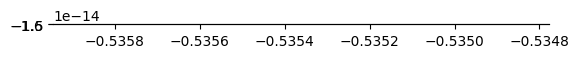

In [1]:
import os, sys
from pathlib import Path
P = Path(os.getcwd()).parent
if str(P) not in sys.path:
    sys.path.insert(0, str(P))

import numpy as np   #noqa E402
import matplotlib.pyplot as plt  #noqa E402
from scipy.optimize import least_squares
from schwarz_cristoffel import (unpack_u, erf_map, sc_along_real_ax,
                                sc_segment, objective, chi_to_chi1, get_pq) #noqa E402

In [2]:
"""
Schwarz-Christoffel mapping: 6-vertex example (A=(inf,0), B=(b,0), C=(b,-c), D=(0,-c), E=(0,-e), F=(inf,0))

Dit is een uitvoerbaar, maar toch pedagogisch script: het legt de stappen uit, bouwt
het parameterprobleem op en geeft een numeriek startpunt. Het is een "working
skeleton" — in praktijk zul je voor stabiele convergentie soms startwaarden of
kleine implementatie-aanpassingen moeten doen (branch-keuze bij wortels, extra
precisie via mpmath, etc.).

Benodigd: numpy, scipy, mpmath, matplotlib (optioneel voor plots).

Belangrijk:
- Dit script behandelt de twee oneindige vertices door ze betas=1 te geven
  (geen singulariteit). In numerische praktijk is het vaak stabieler eerst een
  Möbius-transformatie uit te voeren die infinities in prevertex-ruimte naar
  eindige punten brengt; daarmee krijg je volledig eindige integratiegrenzen.
  De SC-Toolbox (MATLAB) automatiseert dat; in Python moet je het expliciet
  doen als je sterke convergentieproblemen ziet.

- Het doel hier: bouw een concrete routine die de prevertices op de reële as
  oplost zodanig dat de (geschaalde) SC-integralen de bekende z-veld
  zijlengtes (BC, CD, DE) reproduceren.

Auteur: (voorbeeld door ChatGPT voor Theo Olsthoorn)
"""

'\nSchwarz-Christoffel mapping: 6-vertex example (A=(inf,0), B=(b,0), C=(b,-c), D=(0,-c), E=(0,-e), F=(inf,0))\n\nDit is een uitvoerbaar, maar toch pedagogisch script: het legt de stappen uit, bouwt\nhet parameterprobleem op en geeft een numeriek startpunt. Het is een "working\nskeleton" — in praktijk zul je voor stabiele convergentie soms startwaarden of\nkleine implementatie-aanpassingen moeten doen (branch-keuze bij wortels, extra\nprecisie via mpmath, etc.).\n\nBenodigd: numpy, scipy, mpmath, matplotlib (optioneel voor plots).\n\nBelangrijk:\n- Dit script behandelt de twee oneindige vertices door ze betas=1 te geven\n  (geen singulariteit). In numerische praktijk is het vaak stabieler eerst een\n  Möbius-transformatie uit te voeren die infinities in prevertex-ruimte naar\n  eindige punten brengt; daarmee krijg je volledig eindige integratiegrenzen.\n  De SC-Toolbox (MATLAB) automatiseert dat; in Python moet je het expliciet\n  doen als je sterke convergentieproblemen ziet.\n\n- Het

# We try to integrate the argument of the SC transformation along the real axis

The real axis has singularities at the points xP. We could try to carry out a contour intgral, walking along the real axis and make a half circular curve around every singularity we encounter. This may be feasible. Another way is to integrate piecewise along the real axis in segments between the points, leaving a small gap open. This would we similar, but may not be accurate enough.

$$\intop_0^z (s - x_1)^{-k_1}(s-x_2)^{-k_2}(s-x_3)^{-k_3}(s-x_4)^{-k_4}ds$$

We divide the segment using Chebyshev nodes

$$xj = \frac{a+b}{2}+\frac{a-b}{2}\cos\left(\frac{\pi j}{N}\right),\;\;j=0,...,N $$

---
a=1, b=1
computed: [1.3868654736989767, 1.623218608657922, 1.3848818036115562]
computed_ratios  [1.17042254 0.99856967]
desired_ratio s   [4. 2.]
---
a=1, b=1
computed: [1.3868654736989767, 1.623218608657922, 1.3848818036115562]
computed_ratios  [1.17042254 0.99856967]
desired_ratio s   [4. 2.]
---
a=1, b=1
computed: [1.3868654736989767, 1.623218608657922, 1.3848818036115562]
computed_ratios  [1.17042254 0.99856967]
desired_ratio s   [4. 2.]
---
a=1, b=1
computed: [1.386865460027568, 1.6232185980205274, 1.384881789958795]
computed_ratios  [1.17042254 0.99856967]
desired_ratio s   [4. 2.]
---
a=1, b=1
computed: [1.386865470665099, 1.6232186037563634, 1.3848818005520327]
computed_ratios  [1.17042254 0.99856967]
desired_ratio s   [4. 2.]
---
a=7.10827e-07, b=5.98055e-44
computed: [124.41421404871673, 3047.19098387066, 3047.1899922366297]
computed_ratios  [24.49230586 24.49229789]
desired_ratio s   [4. 2.]
---
a=13627.9, b=0.00555361
computed: [0.00015978185915631907, 0.000528359983644

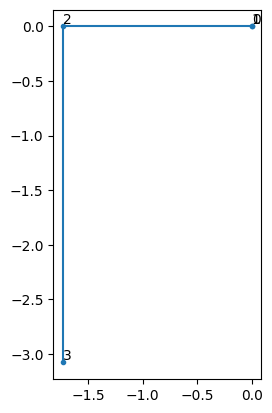

In [3]:

# --- Given angles / k_i ---
# Example values for the corners B, C, D, E
k = [0.5, -0.5, 0.5, 0.5]
b, c, e = 2, 0.5, 1.5
A, B, C, D, E, F = 5 + 0j, b + 0j, b - c * 1j, 0 - c * 1j, 0 - e * 1j, 5 - e * 1j

segment_lengths = np.abs(C - B), np.abs(D - C), abs(E -D)

# --- Initial guess ---
u0 = np.log([1.0, 1.0])  # rough starting guesses for xC-xB, xD-xC, xE-xD
xP = unpack_u(u0)

# --- Solve with least squares ---
res = least_squares(objective, u0,
            xtol=1e-13, ftol=1e-13, gtol=1e-13, max_nfev=200, method='lm', args=[segment_lengths])
print("Optimization success:", res.success, res.message)
print(res)

xP = unpack_u(res.x)
print("xp:", xP)

chi = chi_to_chi1(xP, idxB=0, idxD=2)
print("chi", chi)

Q = 1
Omega =Q * (0.5j -1j / np.pi * np.arcsin(chi + 0j)) # Between 0 at bottom to Q at top
print(Omega.imag)

w = []
for x in xP:
    # --- Compute w for xP points
    w.append(sc_along_real_ax(x, xP, k))
w = np.array(w)


fig, ax = plt.subplots()
ax.plot(w.real, w.imag, '.-')

for ip, wi in enumerate(w):
    ax.text(wi.real, wi.imag, f"{ip}", ha='left', va='bottom')
ax.set_aspect(1)


## Compute the corners of a ditch shape in the w-plane

Given some points along the x-axis and the correct corner angles to generate the shape of the ditch in w-space, we try to compute the points in the w-space. We don't expect the length ratios to be correct, because the points along the x-axis still need to be optimize, no we just want to see the shape of the ditch back, and that is what happens below.

In [4]:
segment_lengths = np.abs(C - B), np.abs(D - C), abs(E -D)

In [5]:
unpack_u(res.x)

array([1.00000000e+00, 2.00000000e+00, 1.24414999e+14, 2.48829998e+14])

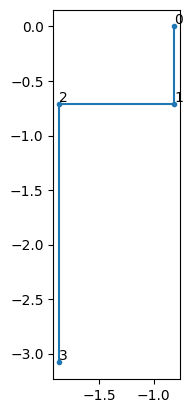

In [6]:
# --- Sets of combinations of points along x and corners (k = alpha/pi values)

xP = np.array([1, 2, 3, 4])
k  = np.array([1, 1, 1, 1]) / 2

# xP = np.array([1, 2, 3])
# k  = np.array([1, 1, 1]) * 2 / 3

# xP = np.array([1, 2, 3, 4, 5, 6])
# k  = np.array([1, 1, 1, 1, 1, 1]) / 3

# xP = np.array([1, 2, 3, 4, 5])
# k  = np.array([1, 1, 1, 1, 1]) * 2 / 5

xP = np.array([1, 2, 3, 4])
k  = np.array([1, -1, 1, 1]) / 2


X = np.linspace(0, xP[-1] - 0.5, 1000)
X = xP
w = []
for x in X:
    # --- Compute w for this point
    w.append(sc_along_real_ax(x, xP, k))
w = np.array(w)

fig, ax = plt.subplots()
ax.plot(w.real, w.imag, '.-')

for ip, wi in enumerate(w):
    ax.text(wi.real, wi.imag, f"{ip}", ha='left', va='bottom')
ax.set_aspect(1)

# Same as above, but now we want to transform these points to the correct ones

Transfromation to match w points with original cross section=0.75-7.206e-17j, q=1.4-0j
0.7152248835539278 0.5364186626654458
1.056326135160683 0.7922446013705122
2.3663861389704213 1.774789604227816


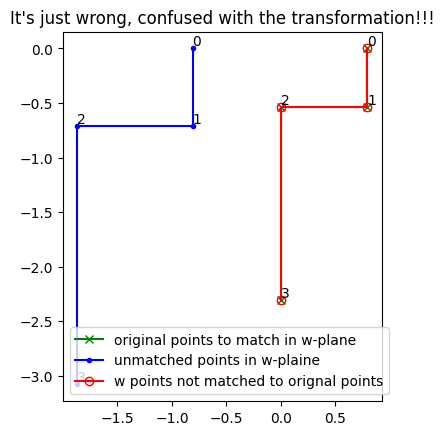

In [7]:
# --- Sets of combinations of points along x and corners (k = alpha/pi values)

xP = np.array([1, 2, 3, 4])
k  = np.array([1, 1, 1, 1]) / 2

# xP = np.array([1, 2, 3])
# k  = np.array([1, 1, 1]) * 2 / 3

# xP = np.array([1, 2, 3, 4, 5, 6])
# k  = np.array([1, 1, 1, 1, 1, 1]) / 3

# xP = np.array([1, 2, 3, 4, 5])
# k  = np.array([1, 1, 1, 1, 1]) * 2 / 5

xP = np.array([1, 2, 3, 4])
k  = np.array([1, -1, 1, 1]) / 2
points = np.array([b + 0j, b - c * 1j, 0 - c * 1j, 0 - e * 1j])
names  = ['B', 'C', 'D', 'E']

X = np.linspace(0, xP[-1] - 0.5, 1000)
X = xP
w = []
for x in X:
    # --- Compute w for this point
    w.append(sc_along_real_ax(x, xP, k))
w = np.array(w)

# Do as if these w points are the result of optimization and have the correct shapes
# and generate points that are assumed the origonal points.
# Construct these original points from the w points keeping the
# Ratio's of the segments the same and muliply by some factor and add a point
# to get these points
b = np.abs(w[2] - w[1])
c = np.abs(w[1] - w[0])
d = np.abs(w[3] - w[2])
e = c + d

# Then assume these points are the real world situation. We want to scale the w point to match the real world points
# wich gives us the p and q such that p w + q = Pnt
points = (0.75 + 0j * np.pi / 12) * np.array([b + 0j, b - c * 1j, 0 - c * 1j, 0 - e * 1j])

# Now make these w points match the orignal points
p, q = get_pq(w[0], w[2], points[0], points[2])
P1 = []
for wi, in zip(w):
    P = p * wi + q
    P1.append(P)
P1 = np.array(P1)


fig, ax = plt.subplots()
ax.set_title("It's just wrong, confused with the transformation!!!")
ax.plot(points.real, points.imag, 'gx-', label='original points to match in w-plane')
ax.plot(w.real,       w.imag,     'b.-', label='unmatched points in w-plaine')
ax.plot(P1.real,      P1.imag,    'ro-', mfc='none', label='w points not matched to orignal points')
print(f"Transfromation to match w points with original cross section={p:.4g}, q={q:.4g}")


for ip, (wi, P1i) in enumerate(zip(w, P1)):
    ax.text(wi.real, wi.imag, f"{ip}", ha='left', va='bottom')
    ax.text(P1i.real, P1i.imag, f"{ip}", ha='left', va='bottom')
ax.set_aspect(1)
ax.legend()

for i in range(len(w) - 1):
    print(np.abs(w[i+1] - w[i]), np.abs(points[i+1] - points[i]))

---
a=1, b=1
computed: [1.3868654736989767, 1.623218608657922, 1.3848818036115562]
computed_ratios  [1.17042254 0.99856967]
desired_ratio s   [4. 2.]
---
a=1, b=1
computed: [1.3868654736989767, 1.623218608657922, 1.3848818036115562]
computed_ratios  [1.17042254 0.99856967]
desired_ratio s   [4. 2.]
---
a=1, b=1
computed: [1.3868654736989767, 1.623218608657922, 1.3848818036115562]
computed_ratios  [1.17042254 0.99856967]
desired_ratio s   [4. 2.]
---
a=1, b=1
computed: [1.386865460027568, 1.6232185980205274, 1.384881789958795]
computed_ratios  [1.17042254 0.99856967]
desired_ratio s   [4. 2.]
---
a=1, b=1
computed: [1.386865470665099, 1.6232186037563634, 1.3848818005520327]
computed_ratios  [1.17042254 0.99856967]
desired_ratio s   [4. 2.]
---
a=7.10827e-07, b=5.98055e-44
computed: [124.41421404871673, 3047.19098387066, 3047.1899922366297]
computed_ratios  [24.49230586 24.49229789]
desired_ratio s   [4. 2.]
---
a=13627.9, b=0.00555361
computed: [0.00015978185915631907, 0.000528359983644

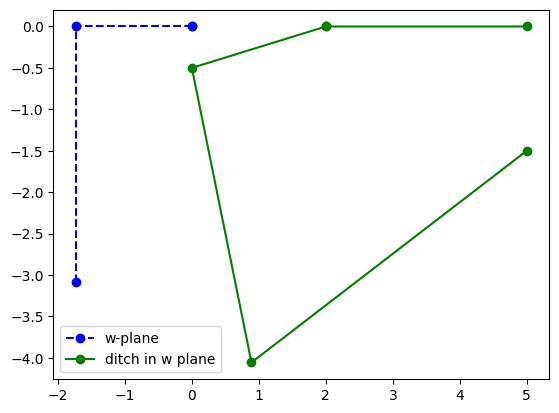

In [9]:
# --- Given angles / k_i ---
k = [0.5, -0.5, 0.5, 0.5]

# --- The cross section is defined by these lenghts
b, c, e = 2, 0.5, 1.5

# --- Corner points B, C, D, E and extra points A and F
A, B, C, D, E, F = 5 + 0j, b + 0j, b - c * 1j, 0 - c * 1j, 0 - e * 1j, 5 - e * 1j

# --- Segment lengths used by the objective function which mathes segment-length ratios
segment_lengths = np.abs(C - B), np.abs(D - C), abs(E -D)

# --- Initial guess ---
u0 = np.log([1.0, 1.0])  # rough starting guesses for xC-xB, xD-xC, xE-xD

# --- Solve with least squares ---
res = least_squares(objective, u0,
            xtol=1e-13, ftol=1e-13, gtol=1e-13, max_nfev=200, method='lm', args=[segment_lengths])
print("Optimization success:", res.success, res.message)
print(res)

# --- the optimized points
xP = unpack_u(res.x)
print("xp:", xP)

# --- put points B and D in the z plane to -1 and 1 to use the arcsin
chi = chi_to_chi1(xP, idxB=0, idxD=2)
print("chi", chi)

# --- Compute Omega in the omega plane
Q = 1
Omega =Q * (0.5j -1j / np.pi * np.arcsin(chi + 0j)) # Between 0 at bottom to Q at top
print(Omega.imag)

# --- Verify be computing the points in the w plane, the segment ratios are now
# correct, which is enough for us to transfrom to the omega plane. But if we
# wish to transfer the omega values back to the z-plane we need to transform
# the points in the we plane to match the actual coordinates of the cross section.
w = []
for x in xP:
    # --- Compute w for xP points
    w.append(sc_along_real_ax(x, xP, k))
w = np.array(w)

p, q = get_pq(w[0], w[2], B, D)

def z_to_w(x, xP, k):
    x = np.asaray(x, dtype=complex)
    w = []
    for xi in x.ravel():
        w.append(sc_along_real_ax(xi, xP, k))
    w = np.array(w).reshape(x.shape)
    W = p * w + q
    return W
    

ditch = [A]
for wi in w:
    ditch.append(p * wi + q)
ditch.append(F)
ditch = np.array(ditch)
    

fig, ax = plt.subplots()
ax.plot(w.real, w.imag, 'bo--', label='w-plane')
ax.plot(ditch.real, ditch.imag, 'go-', label='ditch in w plane' )
ax.legend()
plt.show()

# Back from omega:
eps = 1e-6
psi = np.linspace(-1, 1, 21).clip(-1 + eps, 1 - eps) * Q / 2
phi = np.linspace(0, 2, 41).clip(eps, None)
Phi, Psi = np.meshgrid(phi, psi)
Omega = Phi + 1j * Psi

Z = w_from_omega(Omega, Q, k, xP)

fig, ax = plt.subplots()

ax.plot(Z.real, Z.imag, 'b-', lw=0.5, label='Phi')
ax.plot(Z.real.T, Z.imag.T, 'g-', lw=0.5, label='Psi')
ax.set_aspect(1)
ax.legend()
